### Generate recomendation statistics

In [1]:
from recomender.preprocessor import RatingDataset, MovieDataset
from recomender.evaluation import EvaluationGenerator

import pandas as pd

In [ ]:
ratings_df = RatingDataset().preprocess_ratings(pd.read_csv('data/ml-latest-small/ratings.csv'))
movie_details_df = MovieDataset().join_movies_details(movies_df=pd.read_csv('data/ml-latest-small/movies.csv'), 
                                                      description_df=pd.read_csv("data/ml-latest-small/overviews.csv"))

print("quantity of unique users: "+str(len(set(ratings_df.userId.to_list()))))

combination_pre_process_techniques = [
    (1, (False, False, False)),
    (2, (False, False, True)),
    (3, (False, True, False)),
    (4, (False, True, True)),
    (5, (True, False, False)),
    (6, (True, False, True)),
    (7, (True, True, False)),
    (8, (True, True, True)),
]

evaluate_generator = EvaluationGenerator()

for count, technique in combination_pre_process_techniques:
    evaluate_generator.generate(movie_details_df, ratings_df, technique, count)

### Evaluate Recomendations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
labels = {
    1: 'nenhuma técnica',
    2: 'stemm',
    3: 'lemma',
    5: 'stopword',
    4: 'stemm + lemma',
    6: 'stopword + stemm',
    7: 'stopword + lemma',
    8: 'todas as técnincas'
}

In [5]:
recomendations_1 = pd.read_csv('result/run9-2023-05-23/recomendations_1.csv')
recomendations_2 = pd.read_csv('result/run9-2023-05-23/recomendations_2.csv')
recomendations_3 = pd.read_csv('result/run9-2023-05-23/recomendations_3.csv')
recomendations_4 = pd.read_csv('result/run9-2023-05-23/recomendations_4.csv')
recomendations_5 = pd.read_csv('result/run9-2023-05-23/recomendations_5.csv')
recomendations_6 = pd.read_csv('result/run9-2023-05-23/recomendations_6.csv')
recomendations_7 = pd.read_csv('result/run9-2023-05-23/recomendations_7.csv')
recomendations_8 = pd.read_csv('result/run9-2023-05-23/recomendations_8.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'result/run9-2023-05-23/recomendations_1.csv'

In [ ]:
recomendations_1.head()

,user_id,prc_10,prc_5,prc_3,ap_10,ap_5,ap_3,rr_10,rr_5,rr_3
0,1,0.3,0.2,0.000000,0.140675,0.090000,0.000000,0.250000,0.25,0.0
1,4,0.4,0.6,1.000000,0.638690,0.870000,1.000000,1.000000,1.00,1.0
2,5,0.4,0.2,0.333333,0.384405,0.456667,0.611111,1.000000,1.00,1.0
3,6,0.2,0.4,0.666667,0.435794,0.613333,0.722222,1.000000,1.00,1.0
4,7,0.1,0.0,0.000000,0.021111,0.000000,0.000000,0.111111,0.00,0.0


In [ ]:
x = [3, 5, 10]
x2 = np.arange(len(x))

In [ ]:
y_rec_1_prc = [recomendations_1.prc_3.mean(), recomendations_1.prc_5.mean(), recomendations_1.prc_10.mean()]
y_rec_2_prc = [recomendations_2.prc_3.mean(), recomendations_2.prc_5.mean(), recomendations_2.prc_10.mean()]
y_rec_3_prc = [recomendations_3.prc_3.mean(), recomendations_3.prc_5.mean(), recomendations_3.prc_10.mean()]
y_rec_4_prc = [recomendations_4.prc_3.mean(), recomendations_4.prc_5.mean(), recomendations_4.prc_10.mean()]
y_rec_5_prc = [recomendations_5.prc_3.mean(), recomendations_5.prc_5.mean(), recomendations_5.prc_10.mean()]
y_rec_6_prc = [recomendations_6.prc_3.mean(), recomendations_6.prc_5.mean(), recomendations_6.prc_10.mean()]
y_rec_7_prc = [recomendations_7.prc_3.mean(), recomendations_7.prc_5.mean(), recomendations_7.prc_10.mean()]
y_rec_8_prc = [recomendations_8.prc_3.mean(), recomendations_8.prc_5.mean(), recomendations_8.prc_10.mean()]

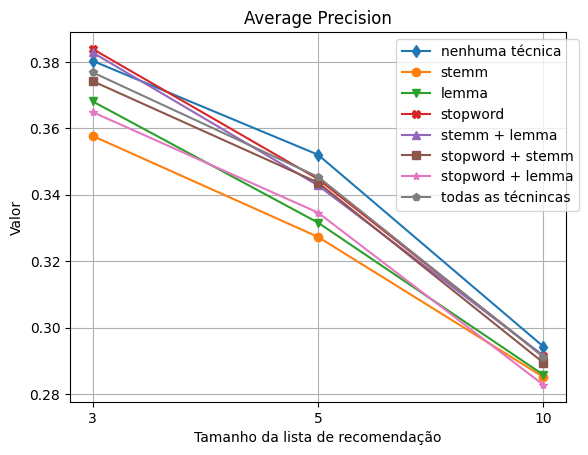

In [ ]:
plt.title("Average Precision")
plt.grid()
plt.plot(x2, y_rec_1_prc, label=labels[1], marker='d')
plt.plot(x2, y_rec_2_prc, label=labels[2], marker='o')
plt.plot(x2, y_rec_3_prc, label=labels[3], marker='v')
plt.plot(x2, y_rec_5_prc, label=labels[5], marker='X')
plt.plot(x2, y_rec_4_prc, label=labels[4], marker='^')
plt.plot(x2, y_rec_6_prc, label=labels[6], marker='s')
plt.plot(x2, y_rec_7_prc, label=labels[7], marker='*')
plt.plot(x2, y_rec_8_prc, label=labels[8], marker='p')
plt.xticks(x2, x)
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('Valor')
plt.xlabel('Tamanho da lista de recomendação')
plt.show()

In [ ]:
y_rec_1_ap = [recomendations_1.ap_3.mean(), recomendations_1.ap_5.mean(), recomendations_1.ap_10.mean()]
y_rec_2_ap = [recomendations_2.ap_3.mean(), recomendations_2.ap_5.mean(), recomendations_2.ap_10.mean()]
y_rec_3_ap = [recomendations_3.ap_3.mean(), recomendations_3.ap_5.mean(), recomendations_3.ap_10.mean()]
y_rec_4_ap = [recomendations_4.ap_3.mean(), recomendations_4.ap_5.mean(), recomendations_4.ap_10.mean()]
y_rec_5_ap = [recomendations_5.ap_3.mean(), recomendations_5.ap_5.mean(), recomendations_5.ap_10.mean()]
y_rec_6_ap = [recomendations_6.ap_3.mean(), recomendations_6.ap_5.mean(), recomendations_6.ap_10.mean()]
y_rec_7_ap = [recomendations_7.ap_3.mean(), recomendations_7.ap_5.mean(), recomendations_7.ap_10.mean()]
y_rec_8_ap = [recomendations_8.ap_3.mean(), recomendations_8.ap_5.mean(), recomendations_8.ap_10.mean()]

In [ ]:
((recomendations_4.ap_5.mean() / recomendations_1.ap_5.mean()) - 1) * 100

-0.29479261898986975

In [ ]:
min_aum_3 = (((recomendations_7.ap_3.mean() / recomendations_1.ap_3.mean()) - 1) * 100) 
max_aum_3 = (((recomendations_8.ap_3.mean() / recomendations_1.ap_3.mean()) - 1) * 100)
min_aum_5 = (((recomendations_4.ap_5.mean() / recomendations_1.ap_5.mean()) - 1) * 100)
max_aum_5 = (((recomendations_8.ap_5.mean() / recomendations_1.ap_5.mean()) - 1) * 100)
min_aum_10 = (((recomendations_3.ap_10.mean() / recomendations_1.ap_10.mean()) - 1) * 100)
max_aum_10 = (((recomendations_8.ap_10.mean() / recomendations_1.ap_10.mean()) - 1) * 100)

In [ ]:
print(f'Tamanho de lista 3: aumento de {min_aum_3:.2f}% a {max_aum_3:.2f}%')
print(f'Tamanho de lista 5: aumento de {min_aum_5:.2f}% a {max_aum_5:.2f}%')
print(f'Tamanho de lista 10: aumento de {min_aum_10:.2f}% a {max_aum_10:.2f}%')

Tamanho de lista 3: aumento de -1.14% a -1.68%
Tamanho de lista 5: aumento de -0.29% a -1.44%
Tamanho de lista 10: aumento de -4.15% a -1.59%


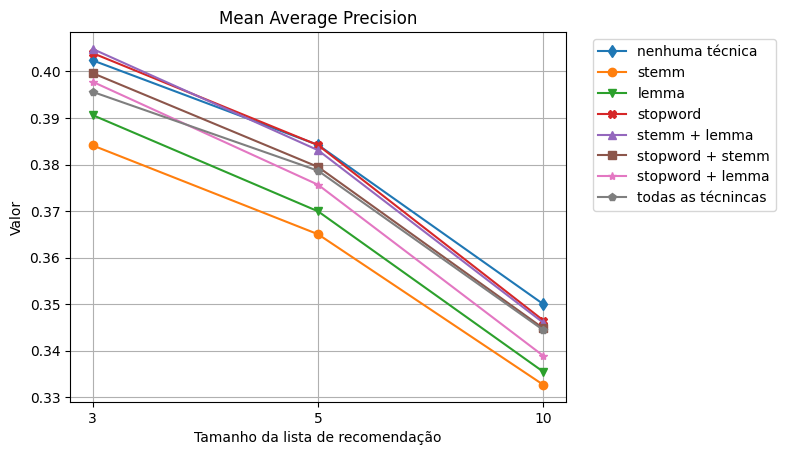

In [ ]:
plt.title('Mean Average Precision')
plt.grid()
plt.plot(x2, y_rec_1_ap, label=labels[1], marker='d')
plt.plot(x2, y_rec_2_ap, label=labels[2], marker='o')
plt.plot(x2, y_rec_3_ap, label=labels[3], marker='v')
plt.plot(x2, y_rec_5_ap, label=labels[5], marker='X')
plt.plot(x2, y_rec_4_ap, label=labels[4], marker='^')
plt.plot(x2, y_rec_6_ap, label=labels[6], marker='s')
plt.plot(x2, y_rec_7_ap, label=labels[7], marker='*')
plt.plot(x2, y_rec_8_ap, label=labels[8], marker='p')
plt.xticks(x2, x)
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('Valor')
plt.xlabel('Tamanho da lista de recomendação')
plt.show()

In [ ]:
y_rec_1_rr = [recomendations_1.rr_3.mean(), recomendations_1.rr_5.mean(), recomendations_1.rr_10.mean()]
y_rec_2_rr = [recomendations_2.rr_3.mean(), recomendations_2.rr_5.mean(), recomendations_2.rr_10.mean()]
y_rec_3_rr = [recomendations_3.rr_3.mean(), recomendations_3.rr_5.mean(), recomendations_3.rr_10.mean()]
y_rec_4_rr = [recomendations_4.rr_3.mean(), recomendations_4.rr_5.mean(), recomendations_4.rr_10.mean()]
y_rec_5_rr = [recomendations_5.rr_3.mean(), recomendations_5.rr_5.mean(), recomendations_5.rr_10.mean()]
y_rec_6_rr = [recomendations_6.rr_3.mean(), recomendations_6.rr_5.mean(), recomendations_6.rr_10.mean()]
y_rec_7_rr = [recomendations_7.rr_3.mean(), recomendations_7.rr_5.mean(), recomendations_7.rr_10.mean()]
y_rec_8_rr = [recomendations_8.rr_3.mean(), recomendations_8.rr_5.mean(), recomendations_8.rr_10.mean()]

In [ ]:
print(recomendations_1.rr_3.mean())
print(recomendations_7.rr_3.mean())

0.5697132616487456
0.5695340501792114


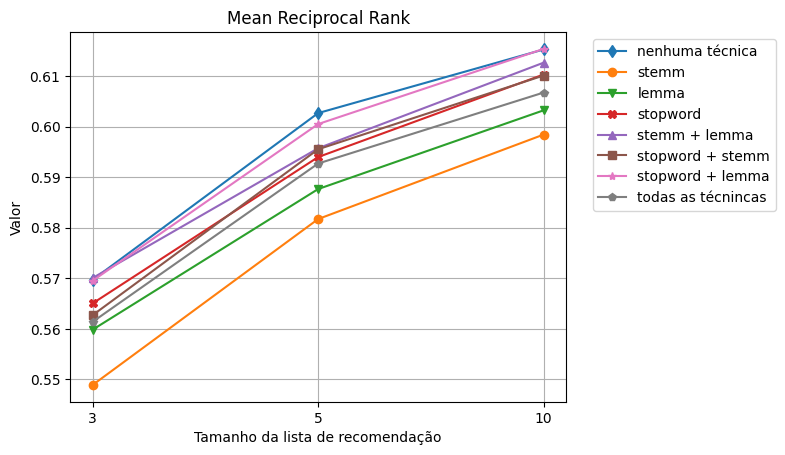

In [ ]:
plt.title('Mean Reciprocal Rank')
plt.grid()
plt.plot(x2, y_rec_1_rr, label=labels[1], marker='d')
plt.plot(x2, y_rec_2_rr, label=labels[2], marker='o')
plt.plot(x2, y_rec_3_rr, label=labels[3], marker='v')
plt.plot(x2, y_rec_5_rr, label=labels[5], marker='X')
plt.plot(x2, y_rec_4_rr, label=labels[4], marker='^')
plt.plot(x2, y_rec_6_rr, label=labels[6], marker='s')
plt.plot(x2, y_rec_7_rr, label=labels[7], marker='*')
plt.plot(x2, y_rec_8_rr, label=labels[8], marker='p')
plt.xticks(x2, x)
plt.legend(bbox_to_anchor=(1.04, 1))
plt.ylabel('Valor')
plt.xlabel('Tamanho da lista de recomendação')
plt.show()

In [ ]:
recomendations_1.rr_5.mean()

0.6026702508960574

In [ ]:
recomendations_3.rr_5.mean()

0.587652329749104

In [ ]:
min_aum_3 = (((recomendations_7.rr_3.mean() / recomendations_1.rr_3.mean()) - 1) * 100) 
max_aum_3 = (((recomendations_8.rr_3.mean() / recomendations_1.rr_3.mean()) - 1) * 100)
min_aum_5 = (((recomendations_7.rr_5.mean() / recomendations_1.rr_5.mean()) - 1) * 100)
max_aum_5 = (((recomendations_8.rr_5.mean() / recomendations_1.rr_5.mean()) - 1) * 100)
min_aum_10 = (((recomendations_7.rr_10.mean() / recomendations_1.rr_10.mean()) - 1) * 100)
max_aum_10 = (((recomendations_8.rr_10.mean() / recomendations_1.rr_10.mean()) - 1) * 100)

In [ ]:
print(f'Tamanho de lista 3: aumento de {min_aum_3:.2f}% a {max_aum_3:.2f}%')
print(f'Tamanho de lista 5: aumento de {min_aum_5:.2f}% a {max_aum_5:.2f}%')
print(f'Tamanho de lista 10: aumento de {min_aum_10:.2f}% a {max_aum_10:.2f}%')

Tamanho de lista 3: aumento de -0.03% a -1.46%
Tamanho de lista 5: aumento de -0.36% a -1.65%
Tamanho de lista 10: aumento de 0.02% a -1.38%
